#1. CNN

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

##1.1. Download and prepare the CIFAR10 dataset

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_labels[:25])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]]


###1.1.1. Verify the data

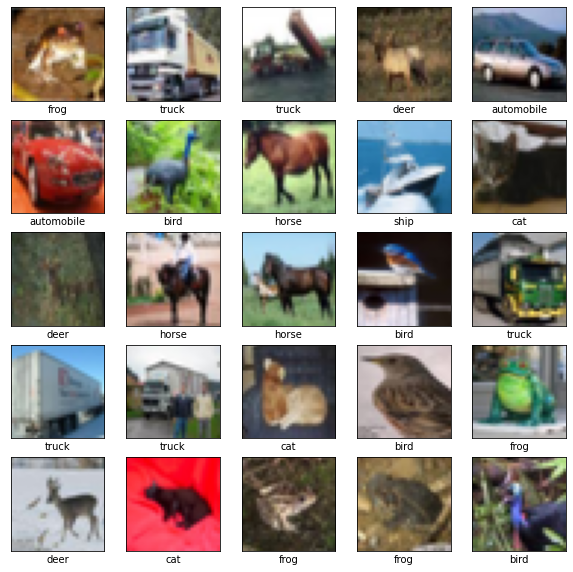

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##1.2. Create the convolutional base

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size, If you are new to these dimensions, color_channels refers to (R,G,B).

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


###1.2.1. Add Dense layers on top

To complete our model, you will feed the last output tensor from the convolutional base into one or more Dense layers to perform classification. Dense layers take vectors as input which are 1D, while the current output is a 3D tensor. 

First, you will flatten or unroll the 3D output to 1D, then add one or more Dense layers on top. 

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

##1.3. Compile and train the model

In [10]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5073 - accuracy: 0.4525 - val_loss: 1.2638 - val_accuracy: 0.5485
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1370 - accuracy: 0.5990 - val_loss: 1.0932 - val_accuracy: 0.6128
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9838 - accuracy: 0.6554 - val_loss: 0.9804 - val_accuracy: 0.6568
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8826 - accuracy: 0.6908 - val_loss: 0.8997 - val_accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8124 - accuracy: 0.7178 - val_loss: 0.8951 - val_accuracy: 0.6962
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7588 - accuracy: 0.7344 - val_loss: 0.8526 - val_accuracy: 0.7060
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7101 - accuracy: 0.7521 - val_loss: 0.8551 - val_accuracy:

##1.4. Evaluate the model

313/313 - 1s - loss: 0.8902 - accuracy: 0.7055


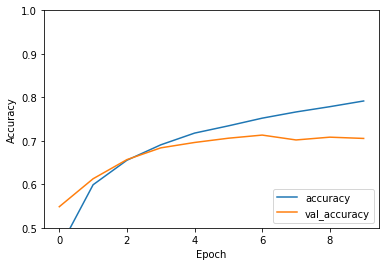

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [15]:
print('{:.4f}'.format(test_acc))

0.7055


#2. Image classification

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator # load data

import os
import numpy as np
import matplotlib.pyplot as plt

##2.1. Load data

In [17]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

###2.1.1. Understand the data

In [0]:
# how many cats and dogs images are in the training and validation directory
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [21]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
# settings
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

###2.1.2. Data preparation

Format the images into appropriately pre-processed floating point tensors before feeding to the network:

1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values. 

ImageDataGenerator class can read images from disk and preprocess them into proper tensors. It will also set up generators that convert these images into batches of tensors - helpful when training the network. 

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [24]:
# After defining teh generators for training and validation images,
# the flow_from_directory method load images from the disk, 
# applies rescaling, and resizes the images into the required dimensions.
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [25]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


###2.1.3. Visualize training images

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

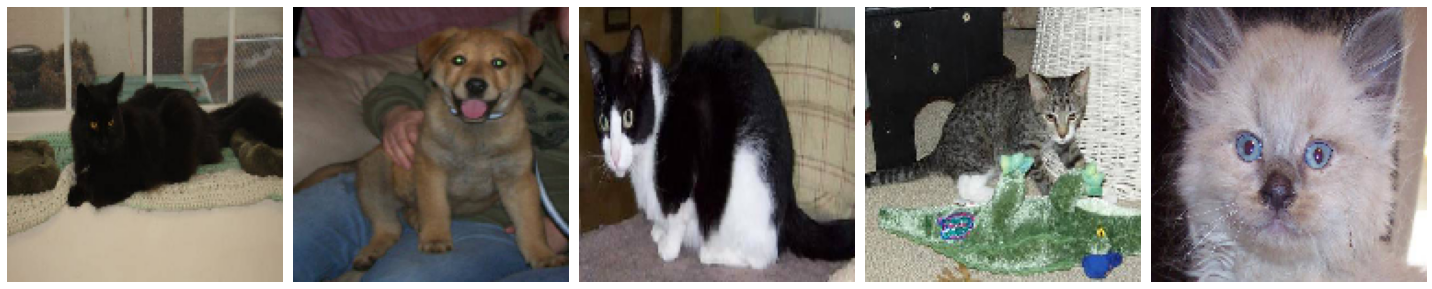

In [28]:
plotImages(sample_training_images[:5])

##2.2. Create the model

In [0]:
model = Sequential(
    [
     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
     MaxPooling2D(),
     Conv2D(32, 3, padding='same', activation='relu'),
     MaxPooling2D(),
     Conv2D(64, 3, padding='same', activation='relu'),
     MaxPooling2D(),
     Flatten(),
     Dense(512, activation='relu'),
     Dense(1)
    ]
)

###2.2.1. Compile the model and Model summary

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

###2.2.2. Train the model

In [31]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size, 
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 7s 471ms/step - loss: 1.0159 - accuracy: 0.5192 - val_loss: 0.6956 - val_accuracy: 0.5089
Epoch 2/15
15/15 [==============================] - 7s 485ms/step - loss: 0.6910 - accuracy: 0.5005 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 7s 493ms/step - loss: 0.6756 - accuracy: 0.5085 - val_loss: 0.6770 - val_accuracy: 0.5011
Epoch 4/15
15/15 [==============================] - 7s 481ms/step - loss: 0.6503 - accuracy: 0.5518 - val_loss: 0.6531 - val_accuracy: 0.5692
Epoch 5/15
15/15 [==============================] - 7s 475ms/step - loss: 0.6133 - accuracy: 0.6464 - val_loss: 0.6482 - val_accuracy: 0.5871
Epoch 6/15
15/15 [==============================] - 7s 474ms/step - loss: 0.5661 - accuracy: 0.6971 - val_loss: 0.6085 - val_accuracy: 0.6842
Epoch 7/15
15/15 [==============================] - 7s 480ms/step - loss

###2.2.3. Visualize training results

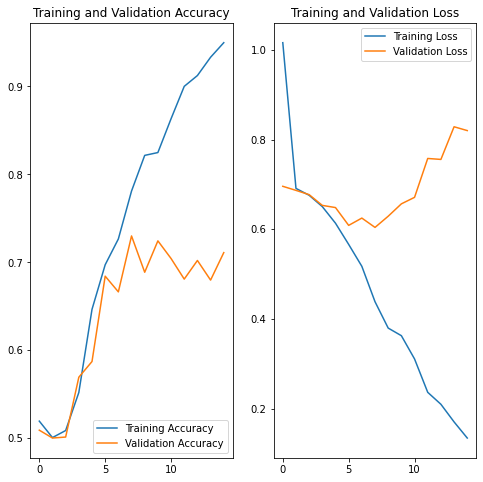

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##2.3. Overfitting



###2.3.1. Data augmentation

Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. 

In [33]:
# Apply horizontal flip
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

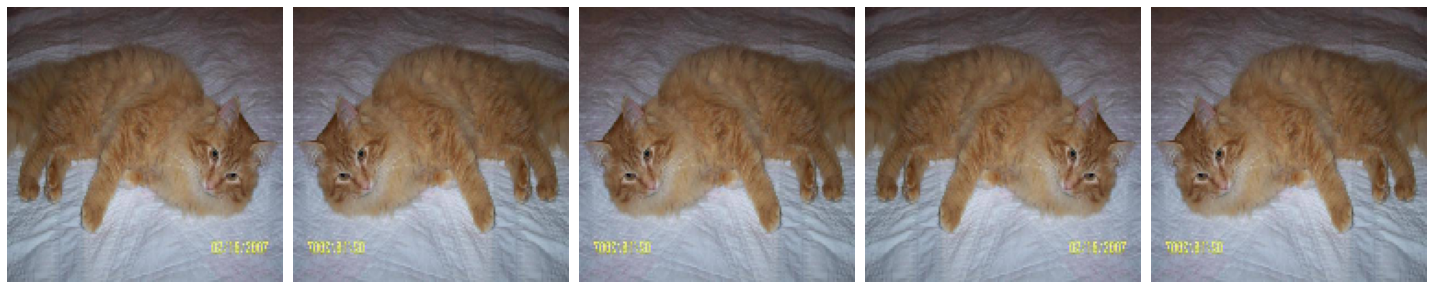

In [35]:
plotImages(augmented_images)

####2.3.1.1. Randomly rotate the image

apply 45 degrees of rotation randomly to the training examples

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


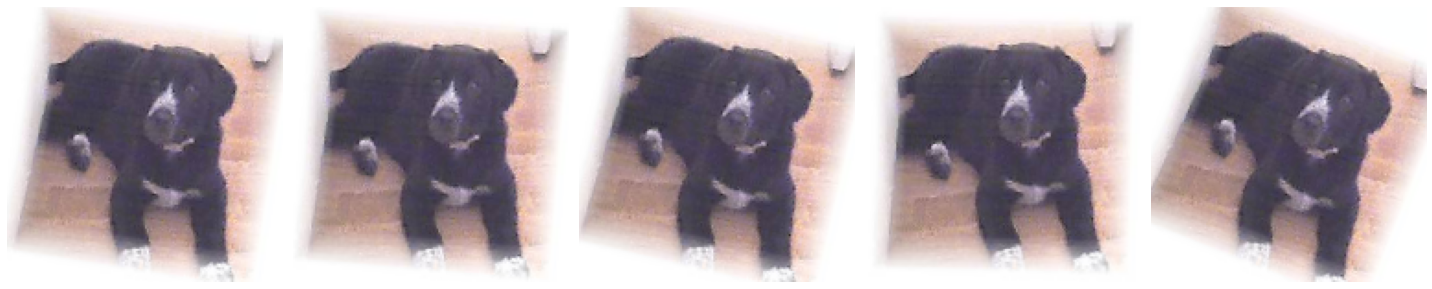

In [38]:
plotImages(augmented_images)

####2.3.1.2. Apply zoom augmentation

In [39]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


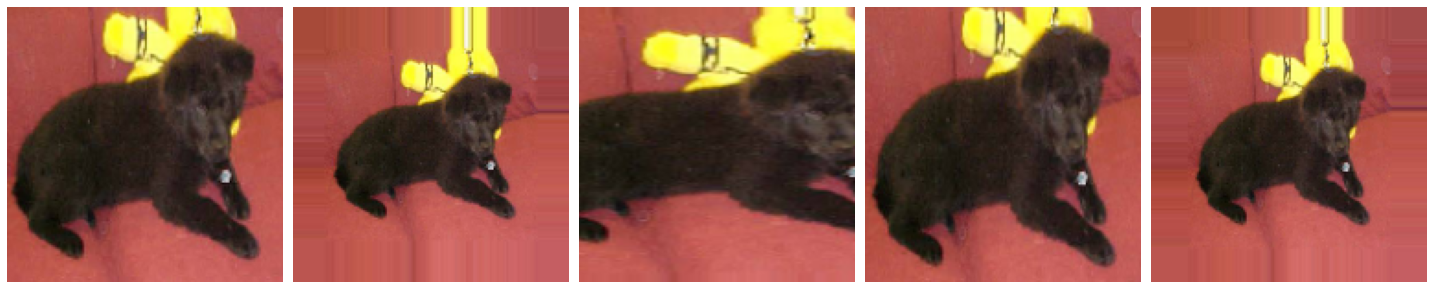

In [40]:
plotImages(augmented_images)

####2.3.1.3. Put it all together

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [42]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


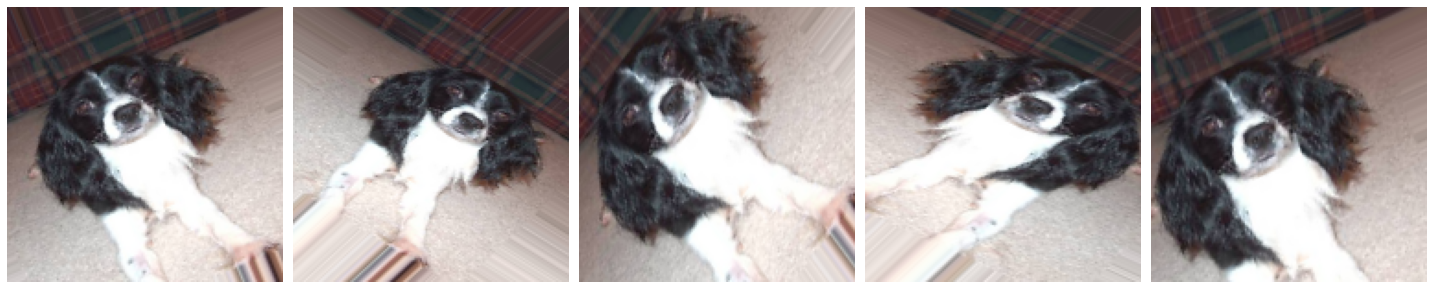

In [43]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

####2.3.1.4. Create validation data generator

In [44]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


###2.3.2. Dropout

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [46]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)       

In [47]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 14s 959ms/step - loss: 1.2080 - accuracy: 0.5021 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 15s 970ms/step - loss: 0.6930 - accuracy: 0.5128 - val_loss: 0.6928 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 14s 949ms/step - loss: 0.6912 - accuracy: 0.4941 - val_loss: 0.6971 - val_accuracy: 0.5067
Epoch 4/15
15/15 [==============================] - 14s 951ms/step - loss: 0.6908 - accuracy: 0.5043 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/15
15/15 [==============================] - 14s 958ms/step - loss: 0.6898 - accuracy: 0.4941 - val_loss: 0.6855 - val_accuracy: 0.4967
Epoch 6/15
15/15 [==============================] - 14s 965ms/step - loss: 0.6750 - accuracy: 0.5417 - val_loss: 0.6666 - val_accuracy: 0.5859
Epoch 7/15
15/15 [==============================] - 14s 958ms/step - loss: 0.6710 - accuracy: 0.5304 - val_loss: 0.6753 - val_accuracy: 0.5469

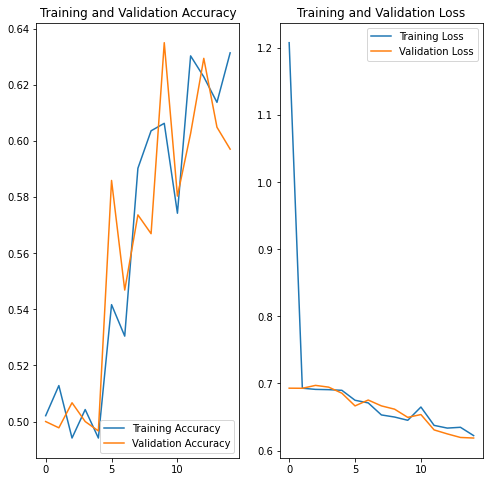

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()